In [15]:
import numpy as np
import pandas as pd

In [16]:
df= pd.read_csv('./original.csv')

In [17]:
df.head()

date     spx      dax     ftse    nikkei
0  07/01/1994  469.90  2224.95  3445.98  18124.01
1  10/01/1994  475.27  2225.00  3440.58  18443.44
2  11/01/1994  474.13  2228.10  3413.77  18485.25
3  12/01/1994  474.17  2182.06  3372.02  18793.88
4  13/01/1994  472.47  2142.37  3360.01  18577.26

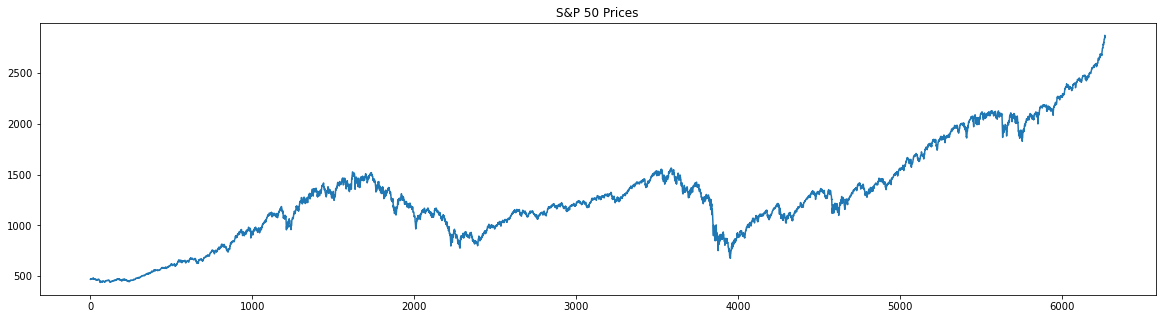

In [18]:
df.spx.plot(figsize= (20,5),title = 'S&P 50 Prices')

In [4]:
df1 = df[['date', 'spx']] 

# Rename the features: These names are NEEDED for the model fitting
df2 = df1.rename(columns = {"date":"ds","spx":"y"}) #renaming the columns of the datasetdata.head(5)

In [5]:
df2.head()

ds       y
0  07/01/1994  469.90
1  10/01/1994  475.27
2  11/01/1994  474.13
3  12/01/1994  474.17
4  13/01/1994  472.47

In [6]:
df2.tail()

ds            y
6264  23/01/2018  2839.130362
6265  24/01/2018  2837.544008
6266  25/01/2018  2839.253031
6267  26/01/2018  2872.867839
6268  29/01/2018  2853.528411

In [7]:
from fbprophet import Prophet

In [19]:
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(df2) # fit the model using all data

In [20]:
future = m.make_future_dataframe(periods=1460) #we need to specify the number of days in future
prediction = m.predict(future)
prediction

ds        trend   yhat_lower   yhat_upper  trend_lower  \
0    1994-01-02   464.594631   351.669566   548.840344   464.594631   
1    1994-01-03   464.824449   340.210662   546.727427   464.824449   
2    1994-01-04   465.054267   339.964010   548.746733   465.054267   
3    1994-01-06   465.513903   337.856190   546.541795   465.513903   
4    1994-01-07   465.743721   352.425778   553.881652   465.743721   
...         ...          ...          ...          ...          ...   
7724 2022-11-26  3465.357052  2512.624813  4224.044721  2625.921111   
7725 2022-11-27  3465.867366  2537.307034  4226.320648  2625.330095   
7726 2022-11-28  3466.377681  2554.394820  4241.782233  2624.739078   
7727 2022-11-29  3466.887996  2552.732084  4224.248134  2624.148062   
7728 2022-11-30  3467.398310  2526.793652  4212.189589  2623.557046   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0      464.594631      -15.103456            -15.103456            -15.103456   
1      464.824449      -20.746929            -20.746929            -20.746929   
2      465.054267      -19.936843            -19.936843            -19.936843   
3      465.513903      -20.938315            -20.938315            -20.938315   
4      465.743721      -21.427874            -21.427874            -21.427874   
...           ...             ...                   ...                   ...   
7724  4296.082159      -66.708284            -66.708284            -66.708284   
7725  4298.149390      -65.594867            -65.594867            -65.594867   
7726  4300.216620      -73.021962            -73.021962            -73.021962   
7727  4302.283851      -73.663946            -73.663946            -73.663946   
7728  4304.351081      -74.508794            -74.508794            -74.508794   

          daily  ...    weekly  weekly_lower  weekly_upper     yearly  \
0    -49.162137  ...  3.690104      3.690104      3.690104  30.368577   
1    -49.162137  ... -2.132349     -2.132349     -2.132349  30.547557   
2    -49.162137  ... -1.145588     -1.145588     -1.145588  30.370882   
3    -49.162137  ... -0.828107     -0.828107     -0.828107  29.051929   
4    -49.162137  ... -0.240274     -0.240274     -0.240274  27.974538   
...         ...  ...       ...           ...           ...        ...   
7724 -49.162137  ...  1.040745      1.040745      1.040745 -18.586893   
7725 -49.162137  ...  3.690104      3.690104      3.690104 -20.122834   
7726 -49.162137  ... -2.132349     -2.132349     -2.132349 -21.727477   
7727 -49.162137  ... -1.145588     -1.145588     -1.145588 -23.356220   
7728 -49.162137  ... -0.384531     -0.384531     -0.384531 -24.962126   

      yearly_lower  yearly_upper  multiplicative_terms  \
0        30.368577     30.368577                   0.0   
1        30.547557     30.547557                   0.0   
2        30.370882     30.370882                   0.0   
3        29.051929     29.051929                   0.0   
4        27.974538     27.974538                   0.0   
...            ...           ...                   ...   
7724    -18.586893    -18.586893                   0.0   
7725    -20.122834    -20.122834                   0.0   
7726    -21.727477    -21.727477                   0.0   
7727    -23.356220    -23.356220                   0.0   
7728    -24.962126    -24.962126                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper         yhat  
0                            0.0                         0.0   449.491175  
1                            0.0                         0.0   444.077520  
2                            0.0                         0.0   445.117424  
3                            0.0                         0.0   444.575588  
4                            0.0                         0.0   444.315848  
...                          ...                         ...          ...  
7724                         0.0                         0.0  3398.648767  
7725 

In [22]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode()

In [25]:
py.iplot([
    #go.Scatter(x=df2['ds'], y=df2['y'], name='y'),
    go.Scatter(x=prediction['ds'], y=prediction['yhat'], name='yhat'),
    go.Scatter(x=prediction['ds'], y=prediction['yhat_upper'], fill='tonexty', mode='none', name='upper'),
    go.Scatter(x=prediction['ds'], y=prediction['yhat_lower'], fill='tonexty', mode='none', name='lower'),
    go.Scatter(x=prediction['ds'], y=prediction['trend'], name='Trend')
])

In [29]:
# Python
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()


INFO:fbprophet:Making 45 forecasts with cutoffs between 1996-03-26 00:00:00 and 2017-12-01 00:00:00


ds        yhat  yhat_lower  yhat_upper       y     cutoff
0 1996-03-27  660.365219  628.554871  692.744645  648.91 1996-03-26
1 1996-03-28  657.710110  624.574725  688.303758  648.94 1996-03-26
2 1996-03-29  658.236731  625.051675  691.268716  645.50 1996-03-26
3 1996-04-01  655.594119  621.443093  688.614624  617.70 1996-03-26
4 1996-04-03  656.913957  622.961091  687.353790  650.81 1996-03-26

In [55]:
print("MAE yhat\t: {}\nMAE yhat_lower: {}\nMAE yhat_upper: {}".format(
    mean_absolute_error(df_cv['y'].values,df_cv['yhat']),
    #mean_absolute_error(df_cv['y'].values,df_cv['trend']),
    mean_absolute_error(df_cv['y'].values,df_cv['yhat_lower']),
    mean_absolute_error(df_cv['y'].values,df_cv['yhat_upper'])))

MAE yhat	: 565.8931108860972
MAE yhat_lower: 698.8384799888383
MAE yhat_upper: 632.5119237502267


In [30]:

# Python
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()


horizon           mse        rmse         mae      mape     mdape  coverage
0 36 days  20334.699872  142.599789  101.713261  0.082556  0.054023  0.524960
1 37 days  20713.573249  143.922108  102.661879  0.083350  0.054274  0.519327
2 38 days  21050.327110  145.087309  103.641297  0.084115  0.055436  0.513696
3 39 days  21250.562806  145.775728  104.056215  0.084461  0.055781  0.511324
4 40 days  21599.331962  146.967112  104.986719  0.085296  0.056288  0.506192

In [32]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [33]:
r2_score(df_cv.y, df_cv.yhat)

0.7739268309186124

In [34]:
mean_squared_error(df_cv.y, df_cv.yhat)

43049.67146908816

In [35]:
mean_absolute_error(df_cv.y, df_cv.yhat)

152.02872533309824

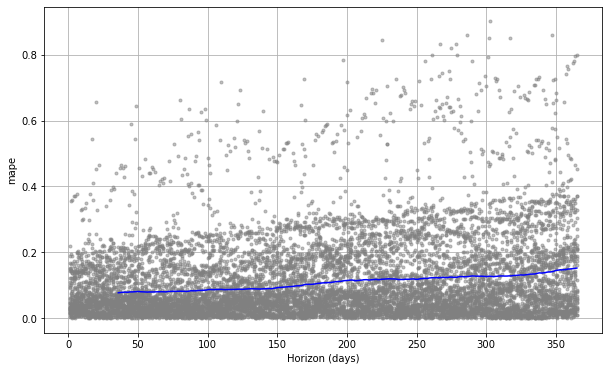

In [50]:
# Python
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

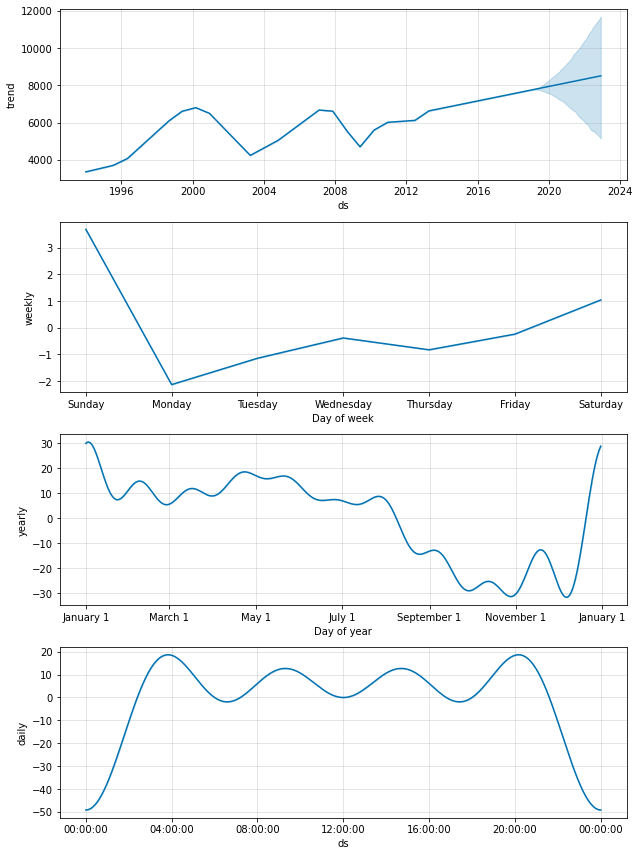

In [52]:
#Print the forecast component
m.plot_components(prediction)
plt.show()